# Telecom Churn Prediction - Clustering

In [ ]:
# to access the data on google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from scipy import stats

import sklearn
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("talk")

# supress unnecessary warning msgs
# import warnings
# warnings.filterwarnings('ignore')

# Telecom Churn Prediction

Which customers are likely to churn? What are the attributes that make you think so?

The features:
  - customerID - customer id
  - gender - client gender (male / female)
  - SeniorCitizen - is the client retired (1, 0)
  - Partner - is the client married (Yes, No)
  - tenure - how many months a person has been a client of the company
  - PhoneService - is the telephone service connected (Yes, No)
  - MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
  - InternetService - client’s Internet service provider (DSL, Fiber optic, No)
  - OnlineSecurity - is the online security service connected (Yes, No, No internet service)
  - OnlineBackup - is the online backup service activated (Yes, No, No internet service)
  - DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
  - TechSupport - is the technical support service connected (Yes, No, No internet service)
  - StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
  - StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
  - Contract - type of customer contract (Month-to-month, One year, Two year)
  - PaperlessBilling - whether the client uses paperless billing (Yes, No)
  - PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
  - MonthlyCharges - current monthly payment
  - TotalCharges - the total amount that the client paid for the services for the entire time
  - Churn - whether there was a churn: customers who left within the last month (Yes or No)

In [ ]:
df_telco = pd.read_csv("/content/drive/MyDrive/propulsion/Machine_Learning/data/telecom_users.csv")
df = df_telco.drop(["Unnamed: 0", "customerID"], axis=1).copy()
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [ ]:
# replace TotalCharges that are blank with NaN
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)

# convert total charges to integer
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [ ]:
# convert yes/no to 1/0
convert = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
# convert = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

df_clean = df.copy()
df_clean[convert] = df[convert].replace({"No": 0, "No internet service": 0, "No phone service": 0, "Male": 0, "Yes": 1, "Female": 1})

In [ ]:
# create dummy variables from categorical variables
df_num = pd.get_dummies(df_clean, prefix=["InternetService", "Contract", "PaymentMethod"])

df_num = df_num.dropna()

## K-means

In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 5985
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5976 non-null   int64  
 1   SeniorCitizen                            5976 non-null   int64  
 2   Partner                                  5976 non-null   int64  
 3   Dependents                               5976 non-null   int64  
 4   tenure                                   5976 non-null   int64  
 5   PhoneService                             5976 non-null   int64  
 6   MultipleLines                            5976 non-null   int64  
 7   OnlineSecurity                           5976 non-null   int64  
 8   OnlineBackup                             5976 non-null   int64  
 9   DeviceProtection                         5976 non-null   int64  
 10  TechSupport                              5976 no

In [ ]:
X = df_num.values

In [ ]:
ss = []
cluster_ranges = range(2, 9)

for K in cluster_ranges:
    # standardize the variables and fit a k-means model
    kmeans_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=K, random_state=18, n_init=1000, max_iter=10000))])
    kmeans_pipeline.fit_predict(X)
    # stores the ss errors
    ss.append(kmeans_pipeline.named_steps["cluster"].inertia_)

## "Optimal" number of clusters (elbow and silhouette method)

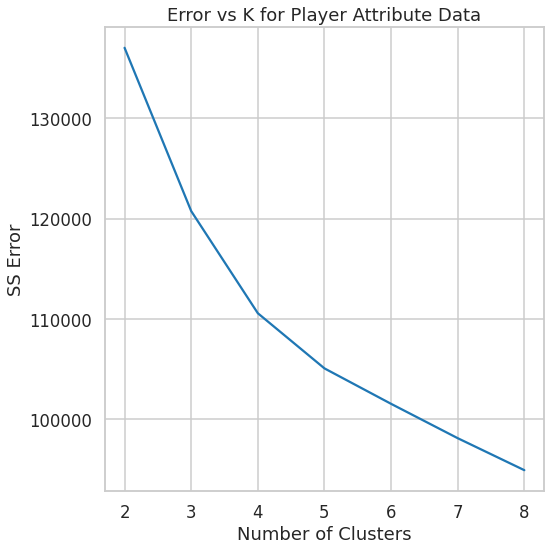

In [ ]:
# Elbow

fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.lineplot(x=cluster_ranges, y=ss)
ax.set_title("Error vs K for Player Attribute Data")
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('SS Error')
plt.tight_layout()
plt.show()

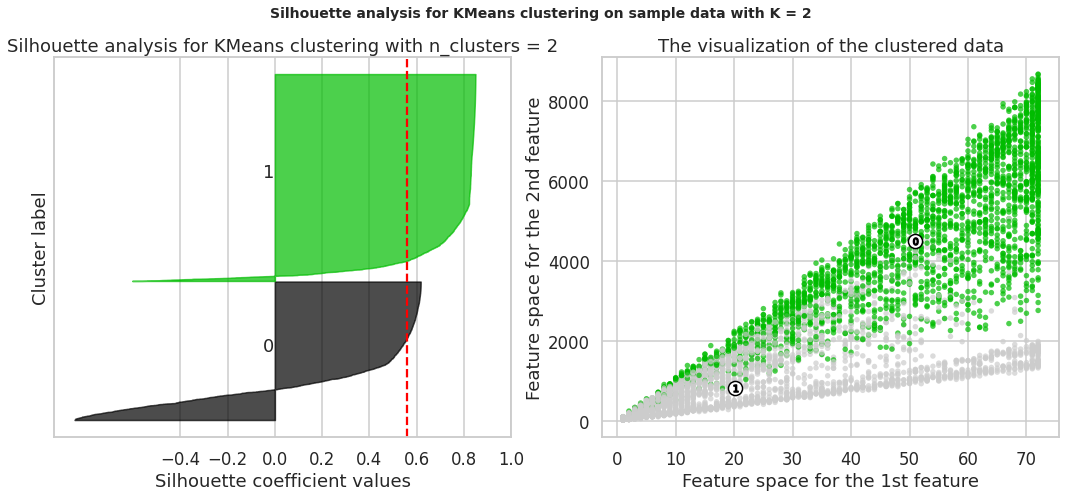

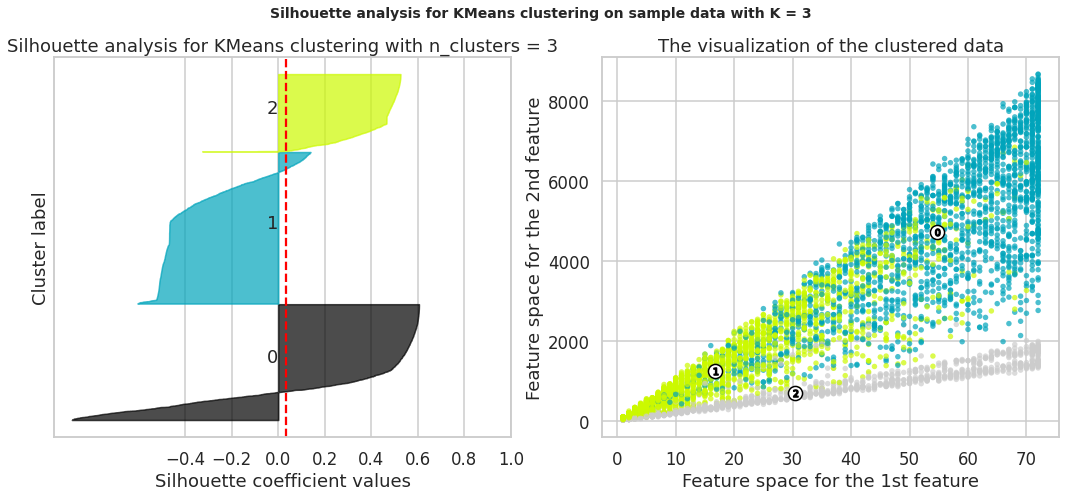

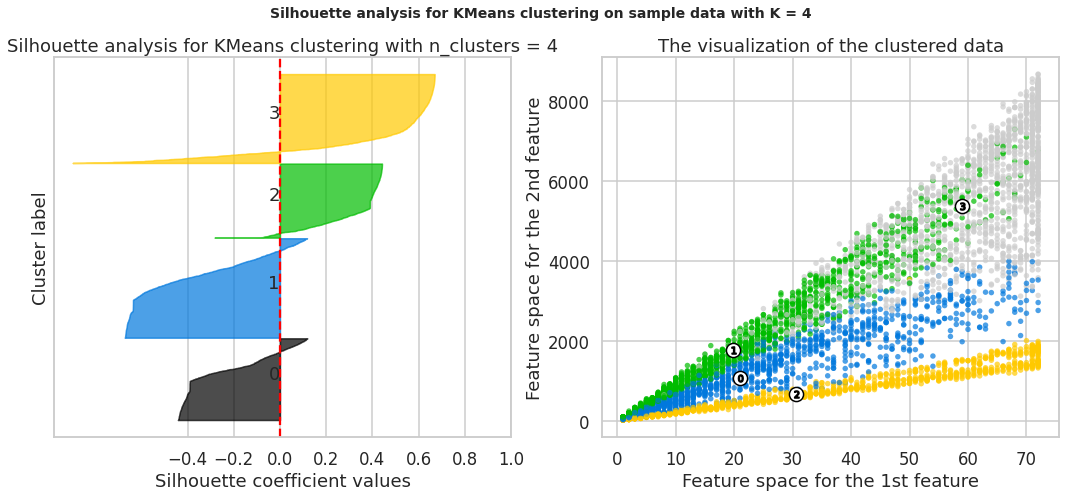

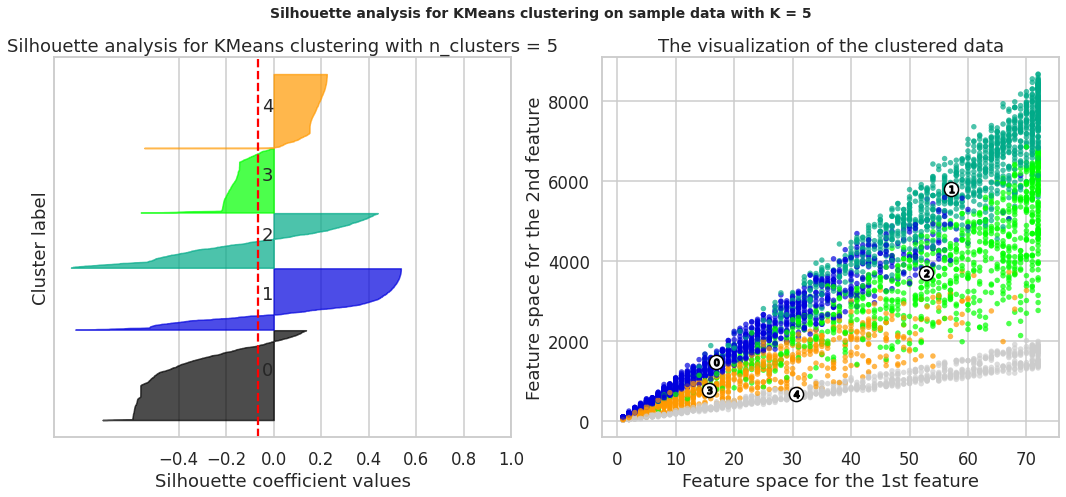

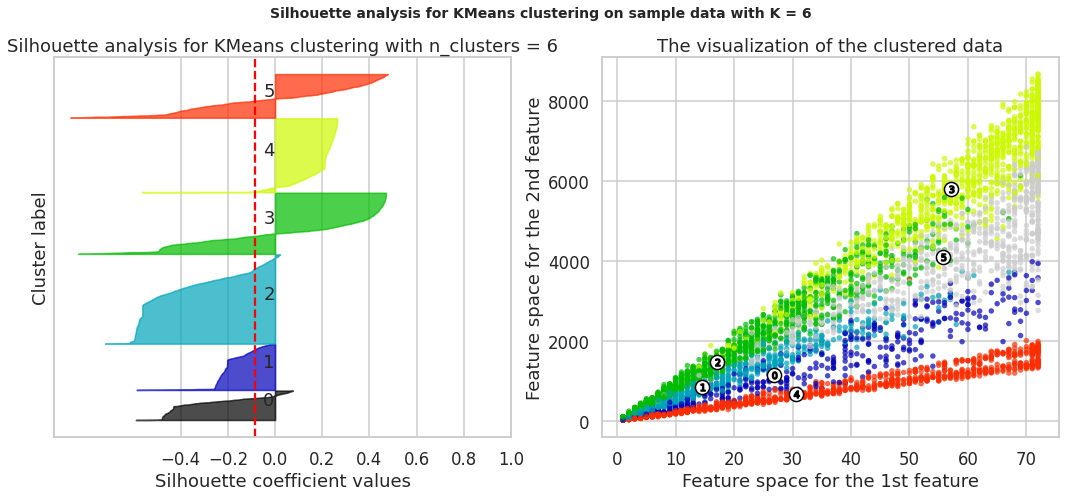

In [ ]:
# Silhouette method

# Code adapted from scikit-learn documentation example

avg_silhouette_scores = []
cluster_ranges = range(2, 7)

# Get rid of warning of too many plots open
plt.rcParams.update({'figure.max_open_warning': 0})

for K in cluster_ranges:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax.set_xlim([-.4, 1])
    # The (K+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (K + 1) * 10])

    # Initialize the Pipeline with n_clusters value and a random generator seed for reproducibility
    kmeans_pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("cluster", KMeans(n_clusters=K, random_state=18, n_init=1000, max_iter=10000))])

    cluster_labels = kmeans_pipeline.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = (silhouette_score(X, cluster_labels))
    avg_silhouette_scores.append(silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"Silhouette analysis for KMeans clustering with n_clusters = {K}")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float) + 1) / K)
    # to visualize the actual data in a continuous space we use PCA
    ax2.scatter(X[:, 4], X[:, 15], marker='o', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    pipeline_centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_
    centers = kmeans_pipeline.named_steps["scaler"].inverse_transform(pipeline_centers)

    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 4], centers[:, 15], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[4], c[15], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        (
            f"Silhouette analysis for KMeans clustering on sample data with K = {K}"
        ),
        fontsize=14,
        fontweight="bold",
    )
print("\n")
 
plt.show()

From the elbow method, 4 clusters seem to be the best choice. However, the Silhouette method does not produce any clear indication, except that 2 clusters seem to be better than the other options (which have overlap between clusters).

### Player Playing Position

In [ ]:
# Standardize the variables first, then calculate top two PCA features
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_std)
x_pca = pca_features[:,0]
y_pca = pca_features[:,1]

K = 2   # use the 2 clusters from Silhouette method 

kmeans = KMeans(n_clusters=K, random_state=18, n_init=1000, max_iter=10000)
cl_labels = kmeans.fit_predict(X_std)
df_pca_features = pd.DataFrame({"cluster_id": cl_labels, 
                                "pc_1": x_pca, 
                                "pc_2": y_pca})
df_pca_features

,cluster_id,pc_1,pc_2
0,1,-1.106097,-3.352347
1,0,1.335767,1.091201
2,1,0.116918,2.124618
3,1,-1.700985,1.560194
4,1,-1.603868,0.622395
...,...,...,...
5971,1,0.296284,3.121120
5972,0,3.240342,-2.108202
5973,1,-2.930243,0.070680
5974,0,1.141828,4.142136


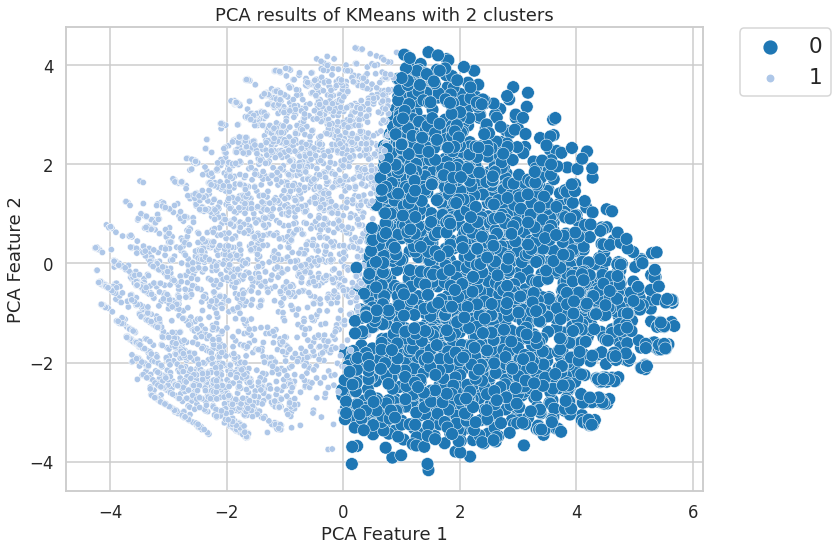

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.scatterplot(x="pc_1", y="pc_2", 
                hue="cluster_id", 
                size="cluster_id", 
                data=df_pca_features, 
                palette="tab20", 
                legend="full")
ax.set_xlabel("PCA Feature 1")
ax.set_ylabel("PCA Feature 2")
ax.set_title("PCA results of KMeans with " + str(K) + " clusters")
ax.legend(bbox_to_anchor=(1.04,1.02), loc="upper left", fontsize="large")
plt.tight_layout()
plt.show()

In [ ]:
# merge cluster to position dataframe
df_cluster = pd.concat([df_num, pd.DataFrame(cl_labels, columns=["Cluster"])], axis=1)

# save dataframe with cluster variable to csv file
df_cluster.to_csv("/content/drive/MyDrive/propulsion/Machine_Learning/data/group_ml_challenge_cluster_full.csv", index=False)


# Analysis

In [ ]:
#load dataframe
df_cluster = pd.read_csv("/content/drive/MyDrive/propulsion/Machine_Learning/data/group_ml_challenge_cluster_full.csv")

In [ ]:
# drop missing values and convert type of Cluster variable to "category"
df_std = df_cluster.dropna().copy()
df_std["Cluster"] = df_cluster["Cluster"].astype("category")

# standardize all variables (except the Cluster identifier)
cols_to_std = df_std.columns[:-1]
df_std[cols_to_std] = df_std[cols_to_std].apply(stats.zscore)
df_std

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cluster
0,-0.981729,-0.439002,1.031678,1.535364,1.611109,0.330345,1.161387,-0.632827,-0.732691,-0.722722,...,-0.885790,1.910508,-1.099088,-0.521082,1.782658,-0.529134,1.894527,-0.710665,-0.543126,1.0
1,1.018611,-0.439002,-0.969295,-0.651311,0.468082,0.330345,-0.861040,-0.632827,1.364831,1.383658,...,1.128935,-0.523421,0.909845,-0.521082,-0.560960,-0.529134,1.894527,-0.710665,-0.543126,0.0
2,1.018611,2.277893,1.031678,-0.651311,0.223148,0.330345,1.161387,-0.632827,-0.732691,-0.722722,...,1.128935,-0.523421,0.909845,-0.521082,-0.560960,1.889880,-0.527836,-0.710665,-0.543126,1.0
3,-0.981729,-0.439002,-0.969295,-0.651311,-1.164813,0.330345,-0.861040,-0.632827,-0.732691,-0.722722,...,-0.885790,-0.523421,0.909845,-0.521082,-0.560960,-0.529134,-0.527836,1.407132,-0.543126,1.0
4,-0.981729,-0.439002,-0.969295,-0.651311,-1.246458,0.330345,-0.861040,1.580212,-0.732691,1.383658,...,-0.885790,-0.523421,0.909845,-0.521082,-0.560960,-0.529134,-0.527836,1.407132,-0.543126,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,1.018611,-0.439002,-0.969295,-0.651311,-0.470833,0.330345,-0.861040,-0.632827,-0.732691,-0.722722,...,-0.885790,1.910508,-1.099088,-0.521082,1.782658,-0.529134,1.894527,-0.710665,-0.543126,1.0
5972,-0.981729,-0.439002,1.031678,-0.651311,0.141503,-3.027135,-0.861040,1.580212,-0.732691,1.383658,...,-0.885790,-0.523421,-1.099088,1.919085,-0.560960,-0.529134,-0.527836,-0.710665,1.841193,0.0
5973,1.018611,2.277893,1.031678,-0.651311,-1.287280,0.330345,-0.861040,-0.632827,1.364831,-0.722722,...,1.128935,-0.523421,0.909845,-0.521082,-0.560960,-0.529134,-0.527836,-0.710665,1.841193,1.0
5974,1.018611,-0.439002,1.031678,1.535364,0.386437,0.330345,-0.861040,-0.632827,-0.732691,-0.722722,...,-0.885790,1.910508,-1.099088,-0.521082,1.782658,-0.529134,-0.527836,-0.710665,1.841193,0.0


In [ ]:
df_stdagg = df_std.groupby("Cluster").mean()

In [ ]:
df_stdagg

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Cluster,,,,,,,,,,,,,,,,,,,,,
0.0,0.024721,0.007938,0.019047,0.004051,0.046017,-0.005543,0.040544,0.062859,0.035551,0.069926,...,0.011535,0.017421,-0.034394,-0.043746,0.042741,0.009984,0.004487,0.020719,-0.005915,-0.018157
1.0,-0.016510,-0.005302,-0.012721,-0.002705,-0.030734,0.003702,-0.027079,-0.041982,-0.023744,-0.046702,...,-0.007704,-0.011635,0.022971,0.029217,-0.028546,-0.006668,-0.002997,-0.013838,0.003951,0.012126


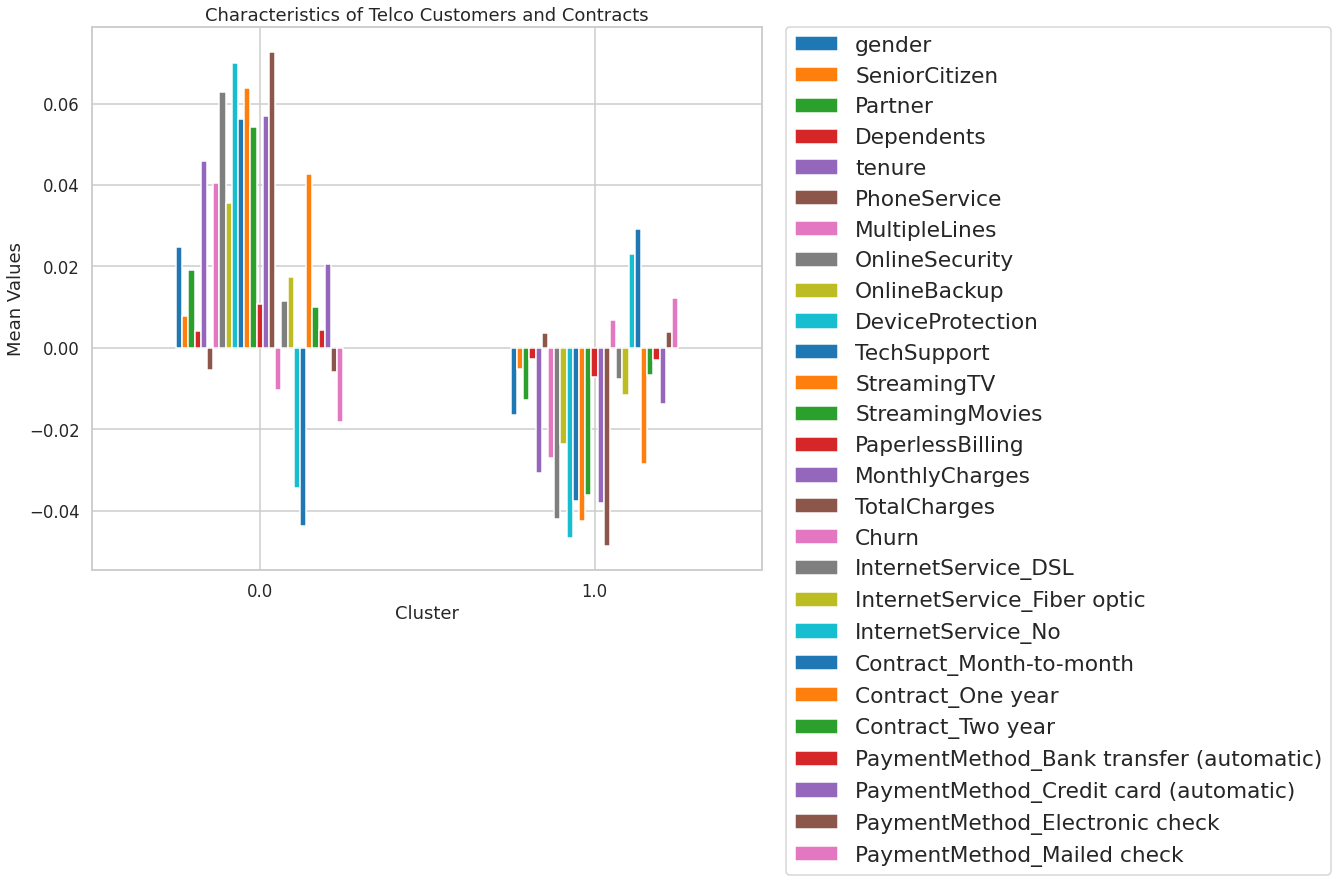

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))

df_stdagg.plot(kind="bar", ax=ax)
ax.legend(bbox_to_anchor=(1.02, 1.02), fontsize='large')
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.ylabel("Mean Values")
plt.title("Characteristics of Telco Customers and Contracts");

# Conclusions

  - Based on the output from the Silhouette analysis for KMeans clustering, thre are two distinct clusters of telecom customers.
  - The first cluster is with higher churn. This is the group of conventional users, with only phone service and without internet service. These users also tend to have shorter month-to-month contract and perfer to use check as the payment method.
  - The second cluster has lower churn. These users subscribe to the internet service and are users of online backup and streaming. They also tend to have longer contract (one year to two years) and use automatic payment system, such as credit card or bank transfer.